#복습 과제

## **Problem 1**

### 1) Classification model에서 Classifier에 Softmax를 사용하는 이유에 대해 서술하시오.

- 결과 값에 대한 class 구분 해석이 어려워 Softmax를 사용하여 class에 대한 확률 값으로 바꿔 해석을 용이하게 함

### 2) Classifier를 통해 Softmax를 거친 이후 얻은 결과가 다음과 같을 때, 
### 각 데이터별 Cross Entropy Loss ($-\sum_{k=1}^Ky_{ik}\log\hat{y}_{ik}$)의 크기가 큰 순서대로 나열하시오. 
### (문제를 푸는 데 숫자를 직접 계산할 필요 없음)
$\hat{y}_1 = \begin{bmatrix}0.45\\0.3\\0.25\end{bmatrix}$, $\hat{y}_2 = \begin{bmatrix}0.45\\0.5\\0.05\end{bmatrix}$, $\hat{y}_3 = \begin{bmatrix}0.33\\0.34\\0.33\end{bmatrix}$, $\hat{y}_4 = \begin{bmatrix}0.33\\0.33\\0.34\end{bmatrix}$

$y_1 = \begin{bmatrix}1.0\\0.0\\0.0\end{bmatrix}$, $y_2 = \begin{bmatrix}1.0\\0.0\\0.0\end{bmatrix}$, $y_3 = \begin{bmatrix}0.0\\1.0\\0.0\end{bmatrix}$, $y_4 = \begin{bmatrix}0.0\\0.0\\1.0\end{bmatrix}$

- y1 == y2 > y3 == y4

### 3) Pretrained model을 사용하여 Transfer learning을 할 때 Dataset size와 Dataset similarity에 따라 '고려'할 수 있는 fine-tuning 전략에 대해 기술하시오.

- Dataset이 크지만 Pretrained model Dataset과 비슷함이 차이가 큰 경우
    - pretrained model을 전체 사용하여 학습
- Dataset이 크지만 Pretrained model Dataset과 비슷함이 비슷한 경우
    - 일부분만 사용하여 학습
- Dataset이 작지만 Pretrained model Dataset과 비슷함이 차이가 큰 경우
    - pretrained model 대부분을 사용하여 학습 (답이 없는 경우가 많음)
- Dataset이 작지만 Pretrained model Dataset과 비슷함이 비슷한 경우
    - 따로 학습하지않고 사용

### 4) Semantic segmentation을 수행함에 있어 pixel accuracy를 사용할 경우 발생할 수 있는 문제점과 Intersection over Union과 Dice coefficient와 같은 metric이 빈번하게 사용되는 이유를 설명하시오.

- 제대로 맞추지 못했음에도 특정 pixel이 차지하는 비중이 많아 accuracy 값이 높게 나올 수 있음
- IoU, Dice 둘 다 ground truth 사이의 겹쳐진 영역(교집합)을 토대로 평가를 진행하기에 객관적이라 생각합니다

### 5) Skip connection의 개념을 설명하고 이를 통해 얻을 수 있는 효과에 대해 기술하시오.

- 압축되어있는 것을 풀었을 때 local한 정보를 잃어버릴 수 있으므로 기존의 값을 뒤로 붙혀 정보의 손실 없이 기억하게 함

## **Problem 2**

###1) 아래의 segmentation 결과를 바탕으로 mean pixel accuracy와 mean IoU, mean Dice coefficient를 계산하시오.

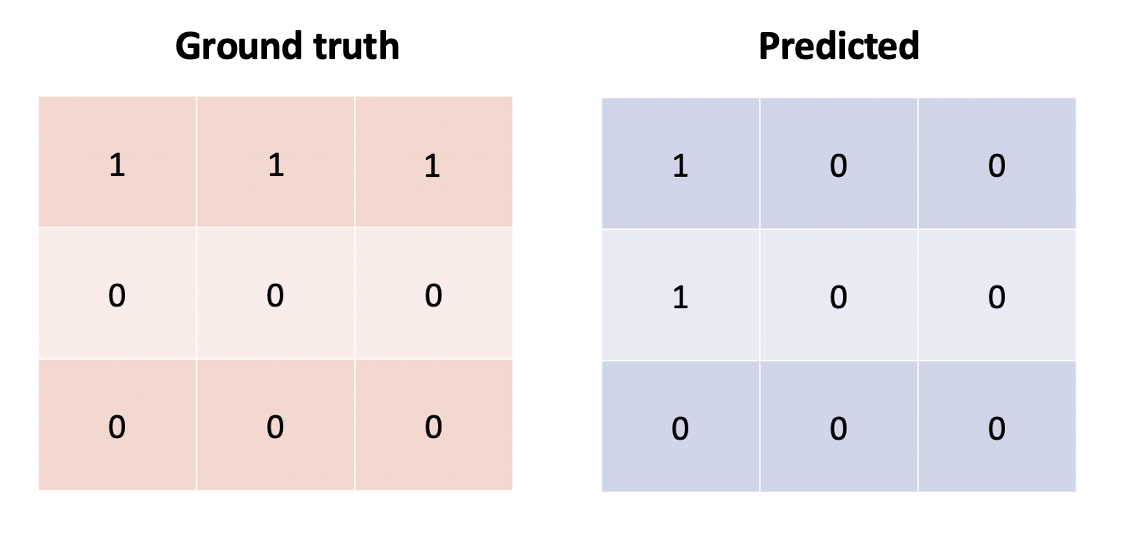

- mean pixel accuracy : 0.583

- mean IoU : 0.437

- mean Dice : 0.58

### 2) Input X에 대해 Kernel K를 사용하여 Transposed Convolution 연산을 수행하시오 (stride=1).

$X = \begin{bmatrix}1 \quad 2\\3\quad 4\end{bmatrix}$, 
$K = \begin{bmatrix}1 \quad 0\\2\quad 1\end{bmatrix}$

In [ ]:
out = [1 2 0
       5 9 2
       6 11 4]

.

.

.

#실습 과제

## Exercise 1. 아래의 도식도를 참고하여 U-Net 코드를 완성하시오.

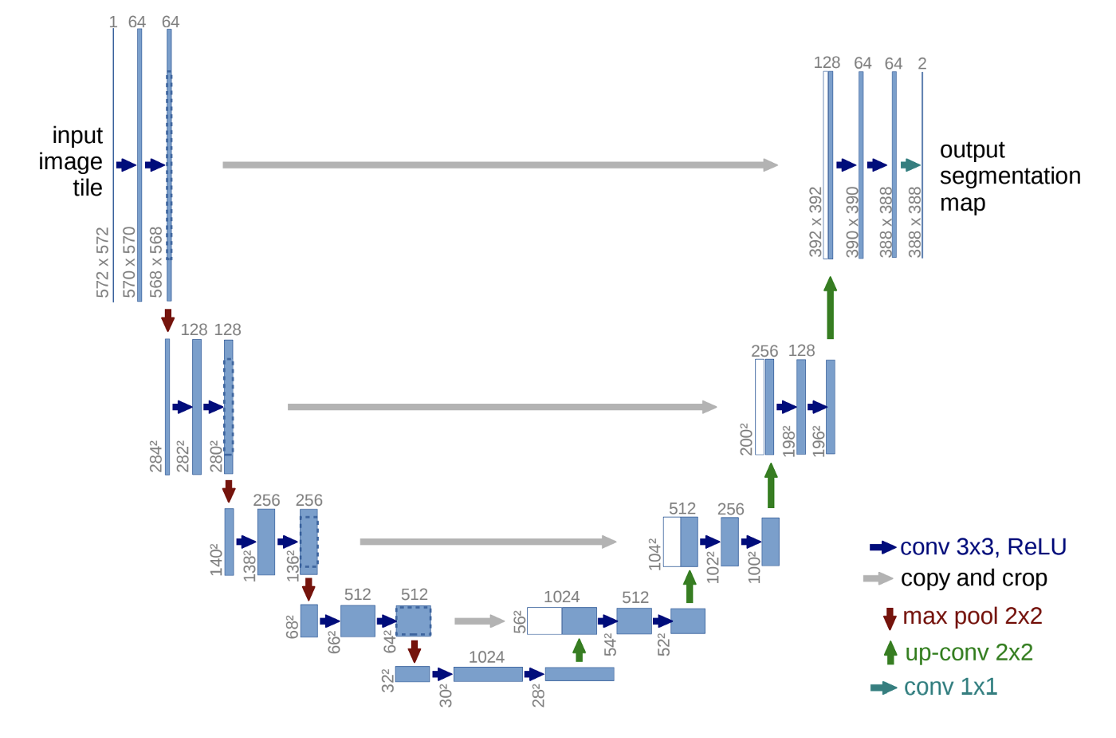

In [ ]:
import os
import numpy as np

import torch
import torch.nn as nn
import torchvision

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        def CBR2d(in_channels, out_channels, kernel_size=3, stride=1, padding=0, bias=True):
            layers = []
            layers += [nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                 kernel_size=kernel_size, stride=stride, padding=padding,
                                 bias=bias)]
            layers += [nn.BatchNorm2d(num_features=out_channels)]
            layers += [nn.ReLU()]

            cbr = nn.Sequential(*layers)

            return cbr

        # Contracting path
        self.enc1_1 = CBR2d(in_channels=1, out_channels=64)
        self.enc1_2 = CBR2d(in_channels=64, out_channels=64)

        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.enc2_1 = CBR2d(in_channels=64, out_channels=128)
        self.enc2_2 = CBR2d(in_channels=128, out_channels=128)

        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.enc3_1 = CBR2d(in_channels=128, out_channels=256)
        self.enc3_2 = CBR2d(in_channels=256, out_channels=256)

        self.pool3 = nn.MaxPool2d(kernel_size=2)

        self.enc4_1 = CBR2d(in_channels=256, out_channels=512)
        self.enc4_2 = CBR2d(in_channels=512, out_channels=512)

        self.pool4 = nn.MaxPool2d(kernel_size=2)

        self.enc5_1 = CBR2d(in_channels=512, out_channels=1024)

        # Expansive path
        self.dec5_1 = CBR2d(in_channels=1024, out_channels=1024)

        self.unpool4 = nn.ConvTranspose2d(in_channels=1024, out_channels=512,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec4_2 = CBR2d(in_channels=2 * 512, out_channels=512)
        self.dec4_1 = CBR2d(in_channels=512, out_channels=512)

        self.unpool3 = nn.ConvTranspose2d(in_channels=512, out_channels=256,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec3_2 = CBR2d(in_channels=2 * 256, out_channels=256)
        self.dec3_1 = CBR2d(in_channels=256, out_channels=256)

        self.unpool2 = nn.ConvTranspose2d(in_channels=256, out_channels=128,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec2_2 = CBR2d(in_channels=2 * 128, out_channels=128)
        self.dec2_1 = CBR2d(in_channels=128, out_channels=128)

        self.unpool1 = nn.ConvTranspose2d(in_channels=128, out_channels=64,
                                          kernel_size=2, stride=2, padding=0, bias=True)

        self.dec1_2 = CBR2d(in_channels=2 * 64, out_channels=64)
        self.dec1_1 = CBR2d(in_channels=64, out_channels=64)

        self.final = nn.Conv2d(in_channels=64, out_channels=2, kernel_size=1, stride=1, padding=0, bias=True)


    def forward(self, x):
        enc1_1 = self.enc1_1(x)
        print(enc1_1.size())
        enc1_2 = self.enc1_2(enc1_1)
        print(enc1_2.size())
        pool1 = self.pool1(enc1_2)
        print(pool1.size())
        enc2_1 = self.enc2_1(pool1)
        print(enc2_1.size())
        enc2_2 = self.enc2_2(enc2_1)
        print(enc2_2.size())
        pool2 = self.pool2(enc2_2)
        print(pool2.size())
        enc3_1 = self.enc3_1(pool2)
        print(enc3_1.size())
        enc3_2 = self.enc3_2(enc3_1)
        print(enc3_2.size())
        pool3 = self.pool3(enc3_2)
        print(pool3.size())
        enc4_1 = self.enc4_1(pool3)
        print(enc4_1.size())
        enc4_2 = self.enc4_2(enc4_1)
        print(enc4_2.size())
        pool4 = self.pool4(enc4_2)
        print(pool4.size())
        enc5_1 = self.enc5_1(pool4)
        print(enc5_1.size())
        dec5_1 = self.dec5_1(enc5_1)
        print(dec5_1.size())

        unpool4 = self.unpool4(dec5_1)
        print(unpool4.size())
        enc4_2_crop = torchvision.transforms.CenterCrop(size=unpool4.size()[3])(enc4_2)
        cat4 = torch.cat((unpool4, enc4_2_crop), dim=1)
        print(cat4.size())
        dec4_2 = self.dec4_2(cat4)
        print(dec4_2.size())
        dec4_1 = self.dec4_1(dec4_2)
        print(dec4_1.size())
         
        ### Complete here ###

        unpool3 = self.unpool3(dec4_1)
        print(unpool3.size())
        enc3_2_crop = torchvision.transforms.CenterCrop(size=unpool3.size()[3])(enc3_2)
        cat3 = torch.cat((unpool3, enc3_2_crop), dim=1)
        print('cat here: ', cat3.size())
        dec3_2 = self.dec3_2(cat3)
        print(dec3_2.size())
        dec3_1 = self.dec3_1(dec3_2)
        print(dec3_1.size())
        unpool2 = self.unpool2(dec3_1)
        print(unpool2.size())
        enc2_2_crop = torchvision.transforms.CenterCrop(size=unpool2.size()[3])(enc2_2)
        cat2 = torch.cat((unpool2, enc2_2_crop), dim=1)
        print('cat here: ', cat2.size())
        dec2_2 = self.dec2_2(cat2)
        print(dec2_2.size())
        dec2_1 = self.dec2_1(dec2_2)
        print(dec2_1.size())
        unpool1 = self.unpool1(dec2_1)
        print(unpool1.size())
        enc1_2_crop = torchvision.transforms.CenterCrop(size=unpool1.size()[3])(enc1_2)
        cat1 = torch.cat((unpool1, enc1_2_crop), dim=1)
        print('cat here: ', cat3.size())
        dec1_2 = self.dec1_2(cat1)
        print(dec1_2.size())
        dec1_1 = self.dec1_1(dec1_2)
        print(dec1_1.size())
        output = self.final(dec1_1)


        ### Complete here ###
        
        return output

x = torch.rand(1,1,572,572)
net = UNet()
y = net(x)
print(y.size())
# 모델이 잘 완성되었을 경우 
# (out): torch.Size([1, 2, 388, 388])

torch.Size([1, 64, 570, 570])
torch.Size([1, 64, 568, 568])
torch.Size([1, 64, 284, 284])
torch.Size([1, 128, 282, 282])
torch.Size([1, 128, 280, 280])
torch.Size([1, 128, 140, 140])
torch.Size([1, 256, 138, 138])
torch.Size([1, 256, 136, 136])
torch.Size([1, 256, 68, 68])
torch.Size([1, 512, 66, 66])
torch.Size([1, 512, 64, 64])
torch.Size([1, 512, 32, 32])
torch.Size([1, 1024, 30, 30])
torch.Size([1, 1024, 28, 28])
torch.Size([1, 512, 56, 56])
torch.Size([1, 1024, 56, 56])
torch.Size([1, 512, 54, 54])
torch.Size([1, 512, 52, 52])
torch.Size([1, 256, 104, 104])
cat here:  torch.Size([1, 512, 104, 104])
torch.Size([1, 256, 102, 102])
torch.Size([1, 256, 100, 100])
torch.Size([1, 128, 200, 200])
cat here:  torch.Size([1, 256, 200, 200])
torch.Size([1, 128, 198, 198])
torch.Size([1, 128, 196, 196])
torch.Size([1, 64, 392, 392])
cat here:  torch.Size([1, 512, 104, 104])
torch.Size([1, 64, 390, 390])
torch.Size([1, 64, 388, 388])
torch.Size([1, 2, 388, 388])


## Exercise 2-1. 아래의 도식도를 참고하여 Model A와 Model B를 완성하시오. (Model B는 skip connection을 통해 Conv1->ReLU->Conv2 이후의 결과에 x를 추가로 더해주는 것을 의미함)

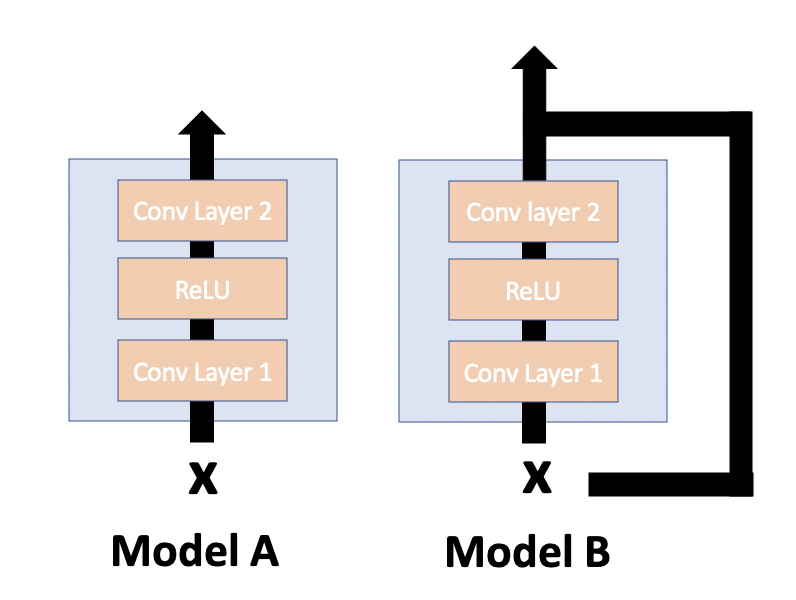

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

class ModelA(nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()

        self.conv1 = nn.Conv2d(1, 1, 3, padding=1)
        self.conv2 = nn.Conv2d(1, 1, 3, padding=1)

    def forward(self, x):
        ### Complete here ###
        output = self.conv2(F.relu(self.conv1(x)))
        ### Complete here ###
        return output

class ModelB(nn.Module):
    def __init__(self):
        super(ModelB, self).__init__()

        self.conv1 = nn.Conv2d(1, 1, 3, padding=1)
        self.conv2 = nn.Conv2d(1, 1, 3, padding=1)

    def forward(self, x):
        ### Complete here ###
        output = self.conv2(F.relu(self.conv1(x))) + x
        
        ### Complete here ###
        return output

cuda


## Exercise 2-2. 다음은 Model A와 Model B로 하여금 Input과 동일한 값을 Output으로 출력할 수 있도록 학습시키는 코드이다. 코드를 실행한 후, 그래프의 결과를 해석하시오.

- Model A보다 skip connection이 적용된 Model B가 loss 값이 현저히 떨어지는 것으로 보아 optimizer landscape가 더 smooth하다고 해석할 수 있음

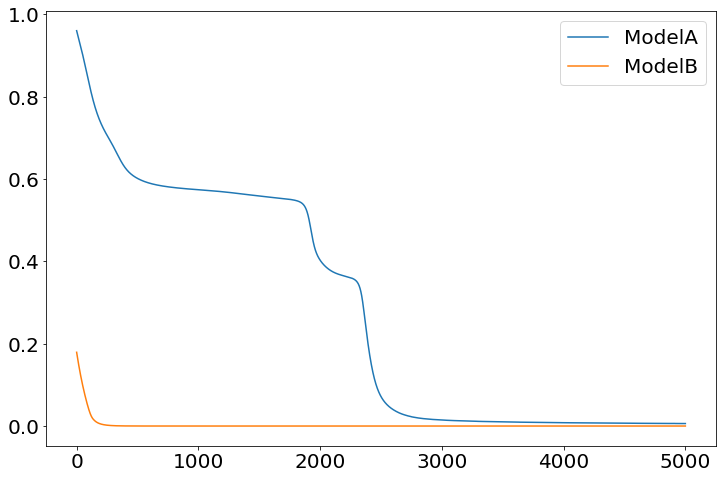

The training loss of ModelA after 5000 epochs is 0.006061974447220564
The training loss of ModelB after 5000 epochs is 2.638910518726334e-05


In [ ]:

x = torch.randn(5000, 1, 10, 10).to(DEVICE)
epochs = 5000

net = ModelA().to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

net.train()
loss_arr = []
for i in range(epochs):
    pred = net(x)
    loss = torch.sqrt(criterion(x, pred))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.item())
    
net2 = ModelB().to(DEVICE)
criterion2 = nn.MSELoss()
optimizer2 = torch.optim.Adam(net2.parameters(), lr=1e-3)

net2.train()
loss_arr2 = []
for i in range(epochs):
    pred = net2(x)
    loss = torch.sqrt(criterion2(x, pred))

    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    loss_arr2.append(loss.item())
    
plt.figure(figsize=(12,8))
plt.plot(loss_arr, label="ModelA")
plt.plot(loss_arr2, label="ModelB")
plt.legend()
plt.show()
print(f"The training loss of ModelA after 5000 epochs is {loss_arr[-1]}")
print(f"The training loss of ModelB after 5000 epochs is {loss_arr2[-1]}")

## Exercise 2-3. 다음은 Model A와 Model B 내 Conv Layer의 Kernel (Filter) 각각이 학습한 결과를 시각화한 것이다. Kernel이 학습한 결과를 바탕으로 위 그래프에서 보여지는 두 모델의 성능 차이에 대해 설명하시오. (Hint: Input과 동일한 값을 Output으로 출력하는 task의 목적(즉, $f(x)=x$)을 고려할 때 Kernel의 가중치들이 어떻게 되는 것이 이상적인지에 대해 고민해볼 것)

- ...

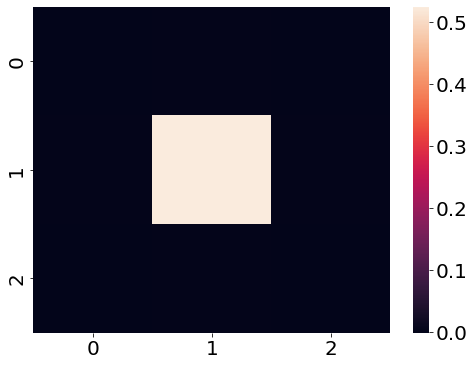

ModelA Conv1 Kernel:  [[-0.00105524  0.00208506 -0.00109031]
 [ 0.00215573  0.5250569   0.00207514]
 [-0.0011532   0.00214133 -0.00103695]]


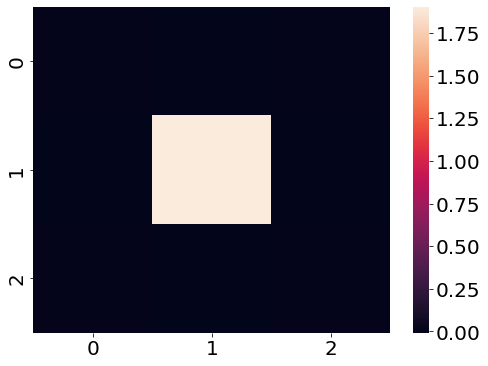

ModelA Conv2 Kernel:  [[ 0.00397459 -0.00753728  0.00409583]
 [-0.0077966   1.9047807  -0.00750747]
 [ 0.00433368 -0.00774092  0.00391041]]


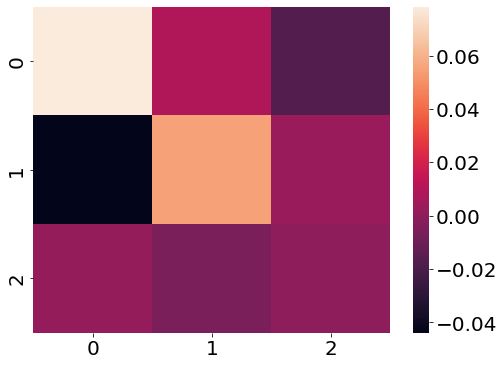

ModelB Conv1 Kernel:  [[ 0.07837876  0.00896486 -0.01743313]
 [-0.0438604   0.05508681  0.00316782]
 [ 0.0015726  -0.0058091  -0.00018414]]


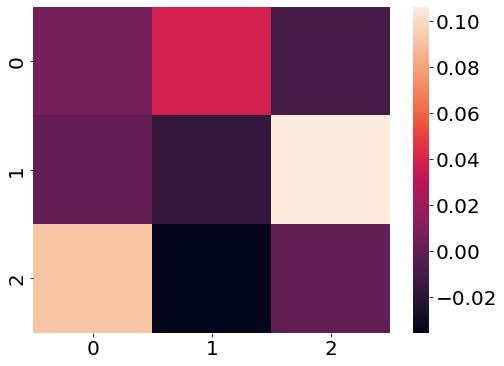

ModelB Conv2 Kernel:  [[ 0.00664981  0.0381317  -0.01008823]
 [ 0.00045276 -0.0163709   0.10639884]
 [ 0.09188081 -0.03571995  0.00013999]]


In [ ]:
net_params = [p.cpu().detach().numpy() for p in list(net.parameters())]
plt.figure(figsize=(8, 6))
sns.heatmap(net_params[0].reshape(3,3))
plt.show()
print("ModelA Conv1 Kernel: ", net_params[0].reshape(3,3))

plt.figure(figsize=(8, 6))
sns.heatmap(net_params[2].reshape(3,3))
plt.show()
print("ModelA Conv2 Kernel: ",net_params[2].reshape(3,3))

net2_params = [p.cpu().detach().numpy() for p in list(net2.parameters())]
plt.figure(figsize=(8, 6))
sns.heatmap(net2_params[0].reshape(3,3))
plt.show()
print("ModelB Conv1 Kernel: ", net2_params[0].reshape(3,3))

plt.figure(figsize=(8, 6))
sns.heatmap(net2_params[2].reshape(3,3))
plt.show()
print("ModelB Conv2 Kernel: ", net2_params[2].reshape(3,3))